# Arbeidskrav 3: ordinære diff.ligninger

Skjemaet for Crank-Nicolson-metoden for den generelle differensiallingningen
$$
y'(t) = f(y)
$$
er gitt som «gjennomsnittet» av eksplisitt og implisitt metode, nemlig
$$
\frac{y_{n+1} - y_n}{\Delta t} = \frac12 (f(y_n) + f(y_{n+1})).
$$

Differensialligningen for eksponensiell vekst kan skrives
$$
y'(t) = a y(t), \quad y(0) = y_0.
$$
For denne differensialligningen er altså $f(y) = ay$.

Utled Crank-Nicolson-skjemaet for eksponensiell vekst.

$
y'_n = a f(y)
$

Eksplisit: 
------------
$$\frac{y_{n+1}  -  y_n}{\Delta t}={f(y_n) }=ay_n$$


Implisitt:
-----------
$$\frac {y_{n+1}-y_n}{\Delta t}={f(y_{n+1})}=ay_{n+1}$$

Crank_nicolson
-----------------------
$$\frac {y_{n+1} -y_n}{\Delta t} = \frac{1}2 (a y_n+a y_{n+1})$$

$$y_{n+1} -y_n = \frac{1}2 \Delta t (a y_n+a y_{n+1})$$

$$y_{n+1} = \frac{1}2 \Delta t (a y_n+a y_{n+1})+ y_n $$

$$y_{n+1}=\frac {a\Delta t y_n}2 + \frac{a \Delta t y_{n+1}}2 + y_n $$

$$y_{n+1}-\frac{a \Delta t y_{n+1}}2=\frac {a\Delta t y_n}2$$

$$y_{n+1}(1-\frac {a\Delta t }2)=y_n(1+\frac{a\Delta t}2)$$

$$y_{n+1}=y_n(1+\frac {a\Delta t }2)*(\frac 1{1-\frac {a \Delta t}2})$$

$$y_{n+1}=\frac {1+\frac {a\Delta t }2}{1-\frac {a \Delta t}2}y_n$$

Implementer skjemaet og plott resultatene. Dette kan gjerne gjøres ved å definiere en funksjon `crank_nicolson(N, T, a, y_0)` som returnerer en `array` med $y$-verdiene. Her er `N` antall tidsskritt, `T` tidsintervallet, mens `a` og `y_0` svarer til $a$ og $y_0$.

Sammenlign nøyaktigheten med eksplisitt og implisitt skjema for ulike tidsskritt ved å plotte alle sammen med den eksakte løsningen. Bruk f.eks. verdiene 2, 5 og 10 for `N`.

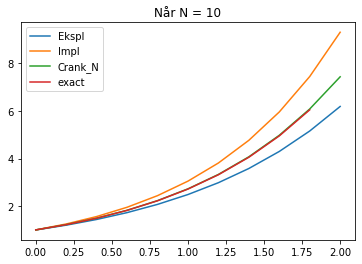

In [77]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt

%matplotlib inline

def eksplisitt(N,T,a,y_0):

    delta_t = T/N
    y_verdier_eks = np.zeros(N + 1) 
    n_verdier = np.arange(N + 1)
    t_verdier = delta_t * n_verdier
    y_verdier_eks[0] = y_0
    for i in range(N):
        y_verdier_eks[i + 1] = delta_t*a*y_verdier_eks[i]+y_verdier_eks[i]
    plt.plot(t_verdier, y_verdier_eks)
    return y_verdier_eks

def crank_nicolson(N,T,a,y_0):

    delta_t = T/N
    y_verdier_crank = np.zeros(N + 1) 
    n_verdier = np.arange(N + 1)
    t_verdier = delta_t * n_verdier
    y_verdier_crank[0] = y_0
    for i in range(N):
        y_verdier_crank[i + 1] = y_verdier_crank[i]*((1+ a*delta_t*0.5)/(1-a*delta_t*0.5))
    plt.plot(t_verdier, y_verdier_crank)

    return y_verdier_crank



def implisitt(N,T,a,y_0):
    delta_t = T/N
    n_verdier = np.arange(N + 1)
    y_verdier_impl = np.zeros(N + 1)  
    y_verdier_impl[0] = y_0
    t_verdier = delta_t * n_verdier
   
    
    for i in range(N):
        y_verdier_impl[i + 1] = y_verdier_impl[i]/(1-a*delta_t)
    plt.plot(t_verdier, y_verdier_impl)
    return y_verdier_impl


n=np.arange(N)
T=2
N=10
dlt=(T/N)
t_v=dlt*n

aa=1
plt.title("Når N = 10")
eksplisitt(10,2,1,1)
implisitt(10,2,1,1)
crank_nicolson(10,2,1,1)
plt.plot(t_v,np.exp(t_v))
plt.legend(["Ekspl","Impl","Crank_N","exact"])


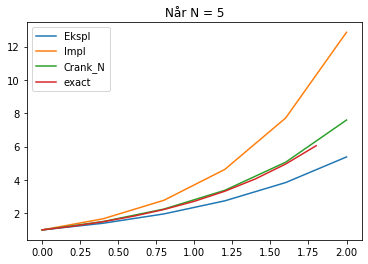

In [78]:

plt.title("Når N = 5")
eksplisitt(5,2,1,1)
implisitt(5,2,1,1)
crank_nicolson(5,2,1,1)
N=5
plt.plot(t_v,np.exp(t_v))

plt.legend(["Ekspl","Impl","Crank_N","exact"])



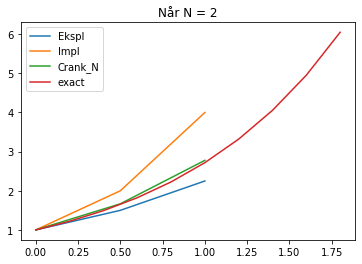

In [79]:
plt.title("Når N = 2")
eksplisitt(2,1,1,1)
implisitt(2,1,1,1)
crank_nicolson(2,1,1,1)
N=2
T=1
plt.plot(t_v,np.exp(t_v))

plt.legend(["Ekspl","Impl","Crank_N","exact"])
